1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy import stats

In [110]:
N = 100
mean = 5 * np.random.rand()
std_dev = 4 * np.random.rand()

x = np.array([np.random.normal(mean, std_dev) for _ in range(N)])

/tmp/ipykernel_968/2936156955.py:20: RuntimeWarning: divide by zero encountered in divide
  errors = 1/np.sqrt(n)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


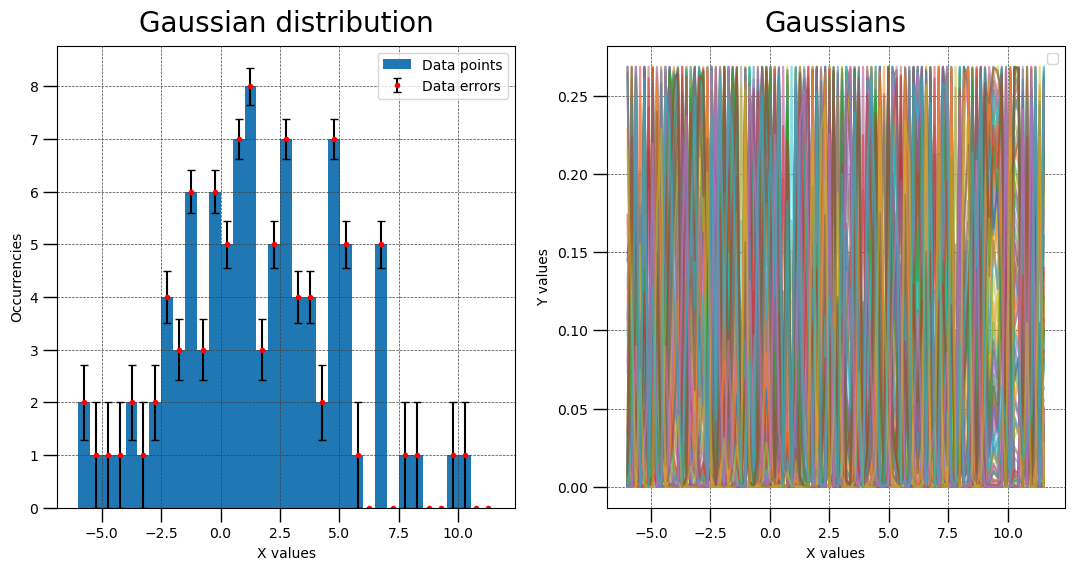

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax1.set_title("Gaussian distribution", fontsize=20, verticalalignment='bottom')
ax1.set_xlabel("X values")
ax1.set_ylabel("Occurrencies")

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

n, bins, patches = ax1.hist(x, bins=np.arange(x.min(), x.max(), 0.5),label='Data points')

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Calculate errors
errors = 1/np.sqrt(n)

# Plot data points with error bars
ax1.errorbar(bin_centers, n, yerr=errors, fmt='.', color='red', ecolor='black', capsize=3, label='Data errors')

ax1.legend()

###################################################################################

default_std = 1.06 * std_dev * (N ** (-1/5))

def gauss(x, mean, std=default_std):
    return stats.norm.pdf(x, loc=mean, scale=std)

ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax2.set_title("Gaussians", fontsize=20, verticalalignment='bottom')
ax2.set_xlabel("X values")
ax2.set_ylabel("Y values")

ax2.tick_params(which='major', width=1.0)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', width=1.0, labelsize=10)
ax2.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

# Plot Gaussians for each value in x
for value in x:
    ax2.plot(np.linspace(x.min(), x.max(), 100), gauss(x, mean=value), alpha=0.5)

ax2.legend()

plt.show()